# **Titanic: Machine Learning from Disaster**

In [41]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [42]:
df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.info()

#we found that some columns such as Age, Cabin,Embarked have nan values from train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
test.info()

#we found that some columns such as Age, Fare, Cabin have nan values from train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [45]:
#column names 
df.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [46]:
#finding shape
df.shape,test.shape

((891, 12), (418, 11))

In [47]:
#analysing numerical data of training set
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
#analysing categorical data of training set
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Elias, Mr. Dibo",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [49]:
#analysing numerical data of test set
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [50]:
#analysing categorical data of test set
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Ilieff, Mr. Ylio",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


# **Visualization**

*Plotting various plots and subplots can give information about the statistical behaviour and trends of training data.*

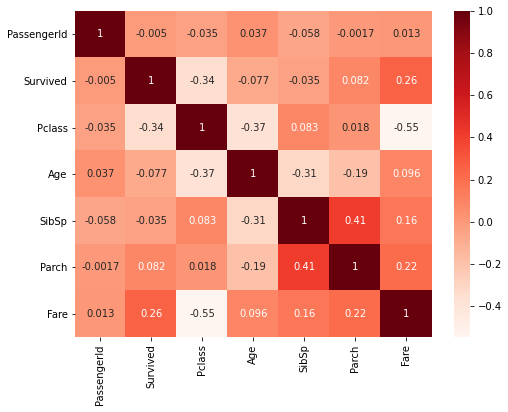

In [51]:
plt.figure(figsize=(8,6))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Pclass and Fare are more related to survived

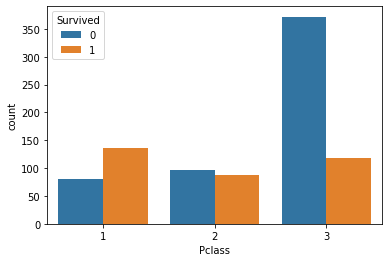

In [52]:
sns.countplot(x='Pclass', hue='Survived', data=df)

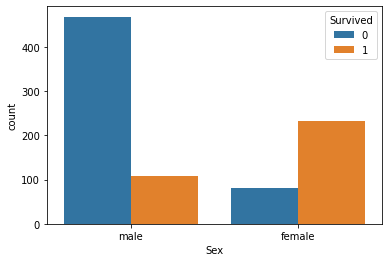

In [53]:
sns.countplot(x="Sex", hue='Survived', data=df)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

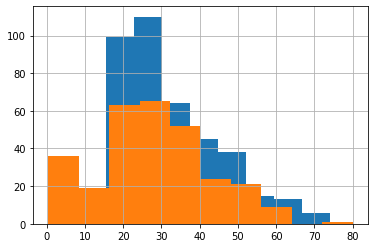

In [54]:
df.groupby('Survived').Age.hist()

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

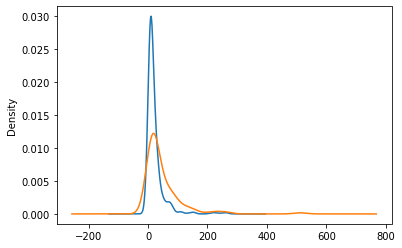

In [55]:
df.groupby('Survived').Fare.plot(kind="kde")

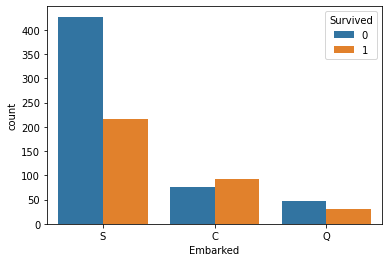

In [56]:
sns.countplot(x='Embarked', hue='Survived', data=df)

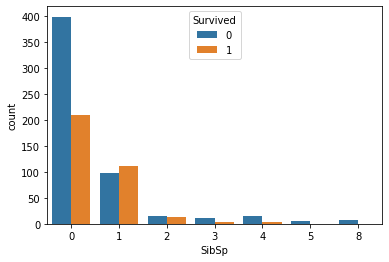

In [57]:
sns.countplot(x='SibSp', hue='Survived', data=df)

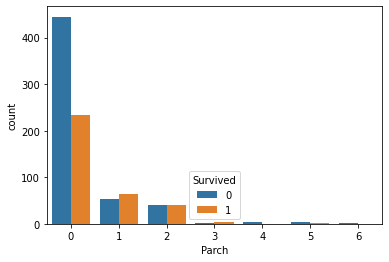

In [58]:
sns.countplot(x='Parch', hue='Survived', data=df)

# **Feature Engineering**

*Feature Engineering operations are necessary to make our data ready for prediciton. Below operations can be done on training and testing dataset together by creating new dataframe using pd.concat but here I have it done separately.*

In [59]:
# dropping some irrelevant columns (information can be found out from these columns after deep analysis)
#separating features and target column

x=df.drop(columns=['PassengerId', 'Survived','Ticket', 'Cabin',"Name"])
y=df["Survived"]

df_test=test.drop(columns=['PassengerId', 'Ticket', 'Cabin',"Name"])

x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [60]:
#dealing with missing data

#train data
imputer = SimpleImputer(missing_values = np.nan , strategy = "mean") 
imputer.fit(x.iloc[:,2:3]) 
x.iloc[:,2:3] = imputer.transform(x.iloc[:,2:3])

x["Embarked"].fillna("S",inplace=True)

#test data
imputer_test1 = SimpleImputer(missing_values = np.nan , strategy = "mean") 
imputer_test1.fit(df_test.iloc[:,2:3]) 
df_test.iloc[:,2:3] = imputer_test1.transform(df_test.iloc[:,2:3])

imputer_test1 = SimpleImputer(missing_values = np.nan , strategy = "median") 
imputer_test1.fit(df_test.iloc[:,5:6]) 
df_test.iloc[:,5:6] = imputer_test1.transform(df_test.iloc[:,5:6])

x.info(),df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3

(None, None)

In [61]:
#encoding categorical data

#train data
labelencoder_train1 = LabelEncoder()
x.iloc[:, 1:2] = labelencoder_train1.fit_transform(x.iloc[:, 1:2])

labelencoder_train1 = LabelEncoder()
x.iloc[:, 6:7] = labelencoder_train1.fit_transform(x.iloc[:, 6:7])

#test data
labelencoder_test1 = LabelEncoder()
df_test.iloc[:, 1:2] = labelencoder_test1.fit_transform(df_test.iloc[:, 1:2])

labelencoder_test2 = LabelEncoder()
df_test.iloc[:, 6:7] = labelencoder_test2.fit_transform(df_test.iloc[:, 6:7])



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
#get dummies

#train
x = pd.get_dummies(x, columns=['Pclass',"Sex","Embarked"])

#test
df_test = pd.get_dummies(df_test, columns=['Pclass',"Sex","Embarked"])


In [63]:
x.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [64]:
df_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [65]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 17)

In [66]:
#Standardisation

#train
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x=scaler.fit_transform(x)
x_test = scaler.transform(x_test)

#test
scaler_test = StandardScaler()
x=scaler_test.fit_transform(x)
df_test = scaler_test.transform(df_test)


# **Training and Validation**

## **Logistic Regression**

In [67]:
#I used grid search cv to find best accuracy and best parameters
        
lgr_params= {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'C' : np.logspace(-4, 4, 20),
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] }

lgr=LogisticRegression()

gcv_lgr=GridSearchCV(lgr, lgr_params, n_jobs=-1, cv=10, verbose=1)
gcv_lgr.fit(x_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1030 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:   10.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
     

In [68]:
gcv_lgr.best_score_,gcv_lgr.best_params_


(0.8203247261345854,
 {'C': 0.004832930238571752, 'penalty': 'l2', 'solver': 'newton-cg'})

## **K-Nearest Neighbours**

In [69]:
knn_params={"n_neighbors":[3,4,5,6,7],
           "weights":['uniform','distance' ],
           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
           'leaf_size' :[20,30,40],
           'p':[1,2]}
knn=KNeighborsClassifier()

knn_gcv=GridSearchCV(knn, knn_params, n_jobs=-1, cv=10, verbose=1)
knn_gcv.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    7.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'n_neighbors': [3, 4, 5, 6, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [70]:
knn_gcv.best_score_,knn_gcv.best_params_

(0.8258411580594679,
 {'algorithm': 'auto',
  'leaf_size': 20,
  'n_neighbors': 3,
  'p': 1,
  'weights': 'uniform'})

## **Random Forest** 

In [71]:
rfc_params = {'max_features': [4, 7, 10, 13], 
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5, 10, 15, 20],
             "criterion":["gini","entropy"]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rfc_gcv = GridSearchCV(rfc, rfc_params, n_jobs=-1, cv=10, verbose=1)
rfc_gcv.fit(x_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:  3.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                   

In [72]:
rfc_gcv.best_score_,rfc_gcv.best_params_

(0.8427034428794993,
 {'criterion': 'entropy',
  'max_depth': 20,
  'max_features': 4,
  'min_samples_leaf': 3})

###**The resulted best accuracy score for all 3 models are:**
1.   Logistic Regression - 0.8203247261345854
2.   K Nearest - 0.8258411580594679
3.   Random Forest - 0.8427034428794993

*Random Forest Classifier is giving the best result out of three. So, we'll use Random Forest Classifier to predict my test dataset. Other option that can be considered is to predict test data using all the three models and output the average.*





# **Prediciting test dataset**

In [ ]:
rfc_gcv.fit(x,y)
test_pred=rfc_gcv.predict(df_test)


In [76]:
test_pred[:5]

array([0, 0, 0, 0, 0])